In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### Loading Data

In [58]:
train = pd.read_csv("data/train.csv")
train_id = train['Id']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
test = pd.read_csv("data/test.csv")
test_id = test['Id']
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### Exploratory Data Analysis

In [61]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [62]:
train.isna().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [63]:
corr_visual = train.corr().drop('SalePrice').sort_values('SalePrice',ascending=False)['SalePrice']
pd.DataFrame({"Features": corr_visual.index, "SalePrice_Correlation": corr_visual.values}).style.background_gradient(cmap = 'Reds')

,Features,SalePrice_Correlation
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


In [64]:
Nullpercent = train.isnull().sum().sort_values(ascending = False) / len(train) * 100
Nullpercent = Nullpercent[Nullpercent > 0]
null_df = pd.DataFrame({'Features': Nullpercent.index, 'Null_Value_Percentage': Nullpercent.values}).style.background_gradient(cmap='Blues')
null_df

,Features,Null_Value_Percentage
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageYrBlt,5.547945
7,GarageCond,5.547945
8,GarageType,5.547945
9,GarageFinish,5.547945


In [65]:
Nullpercent = test.isnull().sum().sort_values(ascending = False) / len(test) * 100
Nullpercent = Nullpercent[Nullpercent > 0]
null_df = pd.DataFrame({'Features': Nullpercent.index, 'Null_Value_Percentage': Nullpercent.values}).style.background_gradient(cmap='Blues')
null_df

,Features,Null_Value_Percentage
0,PoolQC,99.794380
1,MiscFeature,96.504455
2,Alley,92.666210
3,Fence,80.123372
4,FireplaceQu,50.034270
5,LotFrontage,15.558602
6,GarageYrBlt,5.346127
7,GarageQual,5.346127
8,GarageFinish,5.346127
9,GarageCond,5.346127


In [66]:
NA_columns = ['PoolQC','MiscFeature', 'Alley', 'Fence']
train.drop(NA_columns, inplace = True, axis = 1)
test.drop(NA_columns, inplace = True, axis = 1)
#too many null values, so dropped these specific columns

#### Replacing Missing Data 

In [67]:
#Categorical Columns
categorical_train_columns = ["BsmtCond", "BsmtQual", "GarageType", "GarageCond", "GarageFinish",
                 "GarageQual","MasVnrType","BsmtFinType2","BsmtExposure","FireplaceQu","MasVnrArea"]

for i in categorical_train_columns:
    train[i] = train[i].fillna(train[i].mode()[0])
    test[i] = test[i].fillna(train[i].mode()[0])

In [68]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

In [69]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True)

In [70]:
reassess_train = train.isnull().sum().sort_values(ascending=False)
reassess_train = reassess_train[reassess_train > 0]
print(reassess_train)
reassess_test = test.isnull().sum().sort_values(ascending=False)
reassess_test = reassess_test[reassess_test > 0]
print(reassess_test)

BsmtFinType1    37
Electrical       1
dtype: int64
BsmtFinType1    42
MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
BsmtFinSF1       1
Exterior1st      1
KitchenQual      1
GarageCars       1
GarageArea       1
Exterior2nd      1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
SaleType         1
dtype: int64


In [71]:
train['BsmtFinType1'].unique()
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace=True)
test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0],inplace=True)
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [72]:
train['Electrical'].unique()
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [73]:
train.isnull().sum().sort_values(ascending=False)

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [74]:
null_test = test.isnull().sum().sort_values(ascending=False)
null_test = null_test[null_test > 0]
null_test

MSZoning        4
BsmtHalfBath    2
Functional      2
BsmtFullBath    2
Utilities       2
BsmtFinSF1      1
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
Exterior2nd     1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
SaleType        1
dtype: int64

In [75]:
categorical_test = ['MSZoning', 'BsmtHalfBath', 'Functional', 'Utilities','BsmtFullBath', 'SaleType', 'Exterior1st', 
           'Exterior2nd', 'KitchenQual']
numerical_test = ['BsmtFinSF1', 'BsmtFinSF2', 'GarageCars', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea',]

for one_category in categorical_test:
    test[one_category] = test[one_category].fillna(test[one_category].mode()[0])
for one_numerical in numerical_test:
    test[one_numerical] = test[one_numerical].fillna(test[one_numerical].mean())

In [76]:
print(test.isnull().sum().sort_values(ascending=False))

Id               0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 76, dtype: int64


### Visualization

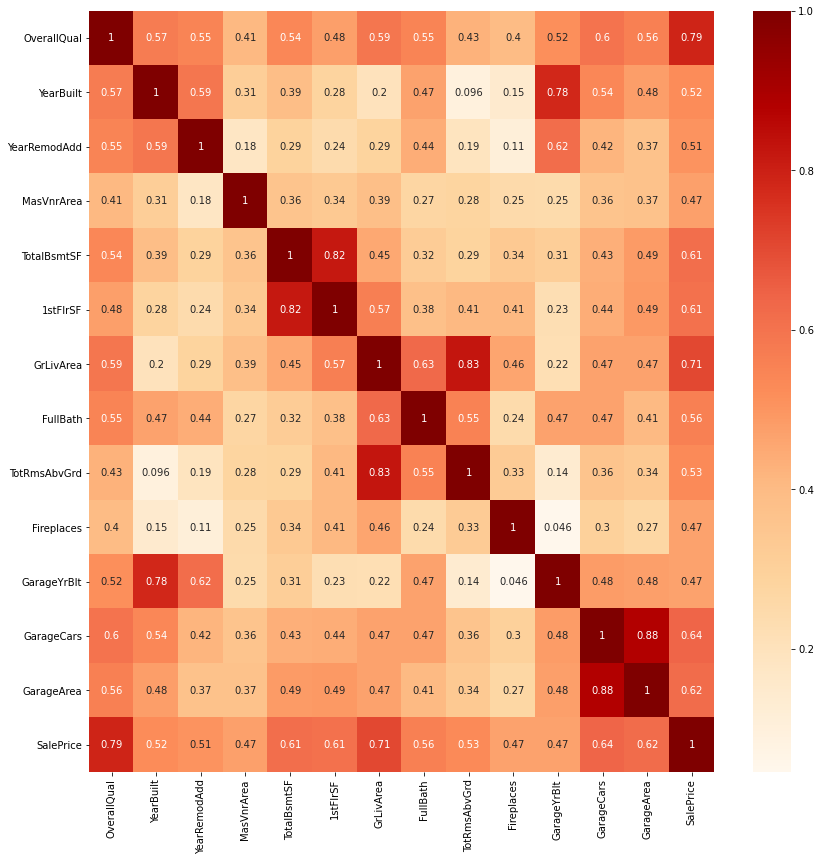

In [77]:
#Correlation
saleprice_correlation=train.corr().index[abs(train.corr()["SalePrice"]) > 0.4]

#Plotting the Correlation in HeatMap for columns where correlation value > 0.4
plt.figure(figsize=(14,14))
correlation_visual = sns.heatmap(train[saleprice_correlation].corr(),annot=True,cmap="OrRd")

0.708624477612652

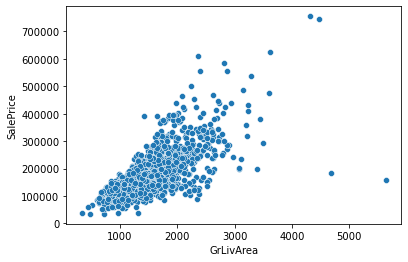

In [78]:
sns.scatterplot(x = 'GrLivArea',y = 'SalePrice', data = train)
train['SalePrice'].corr(train['GrLivArea'])

In [79]:
#Dropping Outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index)
x = train['SalePrice']
y = train['GrLivArea']
x.corr(y)

#Correlation increased

0.7349681645359328

### Modeling

In [80]:
target = train['SalePrice']
train.drop('Id', inplace = True, axis = 1)
test.drop('Id', inplace = True, axis = 1)
train.drop('SalePrice', inplace= True, axis = 1)

In [81]:
print("Test shape:", test.shape)
print("Train shape:", train.shape)

Test shape: (1459, 75)
Train shape: (1458, 75)


In [83]:
test_train = pd.concat([train,test],axis=0)

In [84]:
test_train.shape

(2917, 75)

In [85]:
test_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 75, dtype: object

In [86]:
def find_categories(data):
    categoricals = data.select_dtypes(include = ["object"])
    return list(categoricals.columns)

In [87]:
categorical_columns = find_categories(test_train)

In [88]:
def onehotencoding(data_categorical):
    test_train_converted = test_train
    i = 0
    for column in data_categorical:
        converted = pd.get_dummies(test_train[column],drop_first=True)
        test_train.drop([column],axis=1,inplace=True)
        if i == 0:
            test_train_converted = converted.copy()
        else:           
            test_train_converted = pd.concat([test_train_converted, converted],axis=1)
        i = 1   
    test_train_converted = pd.concat([test_train,test_train_converted], axis=1)   
    return test_train_converted

In [89]:
final_train_test = onehotencoding(categorical_columns)
final_train_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [90]:
final_train_test.shape

(2917, 235)

In [91]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit_transform(final_train_test)

array([[ 0.0673546 , -0.20241039, -0.21643665, ..., -0.12657919,
         0.46303851, -0.30145496],
       [-0.87327191,  0.51858417, -0.06910838, ..., -0.12657919,
         0.46303851, -0.30145496],
       [ 0.0673546 , -0.05821148,  0.14227566, ..., -0.12657919,
         0.46303851, -0.30145496],
       ...,
       [-0.87327191,  4.36388851,  1.26325161, ..., -0.12657919,
        -2.15964758, -0.30145496],
       [ 0.65524616, -0.3466093 ,  0.03863342, ..., -0.12657919,
         0.46303851, -0.30145496],
       [ 0.0673546 ,  0.23018635, -0.06564937, ..., -0.12657919,
         0.46303851, -0.30145496]])

In [92]:
final_train=final_train_test.iloc[:1458,:]
final_test=final_train_test.iloc[1458:,:]
final_test.shape

(1459, 235)

In [94]:
test_id.shape

(1459,)

In [96]:
X = final_train
X.shape

(1458, 235)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,target, test_size = 0.2)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1166, 235) (292, 235)
(1166,) (292,)


In [98]:
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [99]:
print("R^2 Score (Training): {:.4f}".format(linear_model.score(X_train,Y_train)))

R^2 Score (Training): 0.9410


In [100]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, Y_train)
y_predict = model_forest.predict(X_test)
print("R^2 Score (Training): {:.4f}".format(model_forest.score(X_train,Y_train)))
print("R^2 Score (Test): {:.4f}".format(model_forest.score(X_test,Y_test)))

R^2 Score (Training): 0.9817
R^2 Score (Test): 0.9024


In [101]:
id_column = pd.DataFrame(test_id, columns=['Id'])
saleprice_column = pd.DataFrame(y_predict, columns=['SalePrice'])
statistics = pd.concat([id_column, saleprice_column], axis=1)
statistics.head()

,Id,SalePrice
0,1461,130304.10
1,1462,112052.09
2,1463,267458.97
3,1464,134593.29
4,1465,232681.45
